# Lesson 8 - Regression Simulation 

## Author - Emily McAfee



## Instructions

Using the California dairy production dataset, perform time series analysis on the data for one of Cottage Cheese Production, Milk Production, or Ice Cream Production (your choice) to answer the following questions:

1. Is this time series stationary?
2. Is there a significant seasonal component?
3. For the residual from the STL decomposition of the time series, what is the order of the ARMA(p,q) process that best fits?

Then forecast production for 12 months and report both numeric values and plot the confidence intervals.

1. Are the confidence intervals reasonably small compared to the forecast means?
2. How do the confidence intervals behave as time moves to the future?


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/CADairyProduction.csv"

In [2]:
# Load necessary libraries
import numpy as np
import pandas as pd
from math import sin
import statsmodels.tsa.seasonal as sts
import statsmodels.graphics.tsaplots as splt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Check data
CD = pd.read_csv(fileName)
print(CD.head(10))
print(CD.tail(10))

   Year Month  Cotagecheese.Prod  Icecream.Prod  Milk.Prod  N.CA.Fat.Price  \
0  1995   Jan              4.370         51.595      2.112          0.9803   
1  1995   Feb              3.695         56.086      1.932          0.8924   
2  1995   Mar              4.538         68.453      2.162          0.8924   
3  1995   Apr              4.280         65.722      2.130          0.8967   
4  1995   May              4.470         73.730      2.227          0.8967   
5  1995   Jun              4.238         77.994      2.124          0.9160   
6  1995   Jul              4.377         81.475      2.184          0.9160   
7  1995   Aug              4.368         74.981      2.152          0.8934   
8  1995   Sep              3.917         61.530      2.062          0.8934   
9  1995   Oct              4.078         60.022      2.121          0.9434   

   Month.Count  monthNumSqred  monthNumCubed  
0            1              1              1  
1            2              4              8  


In [4]:
# Set index
CD.index = pd.date_range(start = '1-1995' ,end = '1-2014', freq = 'M')

# Check data
print(CD.head(10))
print(CD.tail(10))
CD.dtypes

            Year Month  Cotagecheese.Prod  Icecream.Prod  Milk.Prod  \
1995-01-31  1995   Jan              4.370         51.595      2.112   
1995-02-28  1995   Feb              3.695         56.086      1.932   
1995-03-31  1995   Mar              4.538         68.453      2.162   
1995-04-30  1995   Apr              4.280         65.722      2.130   
1995-05-31  1995   May              4.470         73.730      2.227   
1995-06-30  1995   Jun              4.238         77.994      2.124   
1995-07-31  1995   Jul              4.377         81.475      2.184   
1995-08-31  1995   Aug              4.368         74.981      2.152   
1995-09-30  1995   Sep              3.917         61.530      2.062   
1995-10-31  1995   Oct              4.078         60.022      2.121   

            N.CA.Fat.Price  Month.Count  monthNumSqred  monthNumCubed  
1995-01-31          0.9803            1              1              1  
1995-02-28          0.8924            2              4              8  
19

Year                   int64
Month                 object
Cotagecheese.Prod    float64
Icecream.Prod        float64
Milk.Prod            float64
N.CA.Fat.Price       float64
Month.Count            int64
monthNumSqred          int64
monthNumCubed          int64
dtype: object

Text(0.5, 1.0, 'California Dairy Production Time Series')

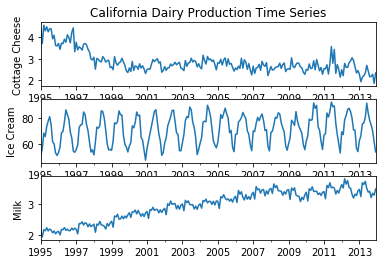

In [5]:
# Plot the three time series to see which would be interesting to investigate further
f, (ax1, ax2, ax3) = plt.subplots(3,1)
CD['Cotagecheese.Prod'].plot(ax = ax1)
CD['Icecream.Prod'].plot(ax = ax2)
CD['Milk.Prod'].plot(ax = ax3)
ax1.set_ylabel('Cottage Cheese')
ax2.set_ylabel('Ice Cream')
ax3.set_ylabel('Milk')
ax1.set_title('California Dairy Production Time Series')

### What can we learn from the above three plots
It's really interesting to see all three dairy products acting so diffrently in the market. Above we can see that overall cottage cheese, ice cream, and milk all appear to have seasonal components to them. Most notably, we can see ice cream sales tend to be at their peak during summer (i.e. the middle of the year) - this is a good sanity check to know that we plotted correctly, as this makes sense.Sales of cottage cheese don't seem to be as consistent as for milk, with a severe decline in production starting in 1995 and leveling out around 2001. Milk production has grown, but the seasonal variation growing with time tells us we should likely use a multiplicative decomposition model. Since milk seems to have the most clear trend, we'll dive into that one a little deeper with our time-series analysis.

Index(['Year', 'Month', 'Cotagecheese.Prod', 'Icecream.Prod', 'Milk.Prod',
       'N.CA.Fat.Price', 'Month.Count', 'monthNumSqred', 'monthNumCubed',
       'milk_log'],
      dtype='object')

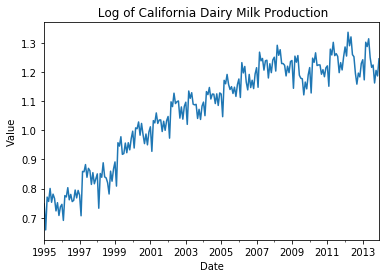

In [6]:
# Log transform the values/plot result for milk production time series
def plot_ts(ts, title):
    ts.plot()
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')

CD['milk_log'] = np.log(CD['Milk.Prod'])
plot_ts(CD.milk_log, ' Log of California Dairy Milk Production')
CD.columns

### What can we learn from this time series
There is a significant trend in dairy production. The time series have a noticeable seasonal component. People buy more milk at the beginning of the year. The magnitude of the seasonal component of milk with trend increased in the not log transformed time series. The seasonal component of the log transformed series has a nearly constant magnitude, but starts to begin a new pattern around 2008 - the seasonality becomes noticeably more robust. This demonstrates that an STL decomposition is required.

               resid     trend  seasonal
1995-01-31       NaN       NaN  0.009169
1995-02-28       NaN       NaN -0.063646
1995-03-31       NaN       NaN  0.046570
1995-04-30       NaN       NaN  0.026694
1995-05-31       NaN       NaN  0.053586
1995-06-30       NaN       NaN  0.004263
1995-07-31  0.026259  0.746283  0.008616
1995-08-31  0.016510  0.747581  0.002307
1995-09-30  0.014267  0.749151 -0.039741
1995-10-31  0.008047  0.750003 -0.006162
               resid     trend  seasonal
2013-03-31  0.024035  1.231219  0.046570
2013-04-30  0.028554  1.231778  0.026694
2013-05-31  0.027831  1.232307  0.053586
2013-06-30  0.012240  1.233112  0.004263
2013-07-31       NaN       NaN  0.008616
2013-08-31       NaN       NaN  0.002307
2013-09-30       NaN       NaN -0.039741
2013-10-31       NaN       NaN -0.006162
2013-11-30       NaN       NaN -0.039215
2013-12-31       NaN       NaN -0.002441


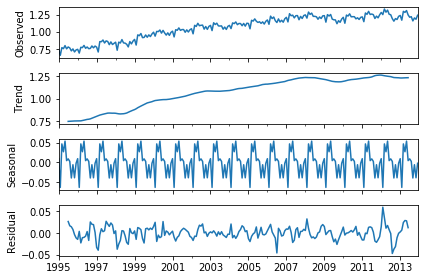

In [7]:
## Using a multiplicative model becasue the magnitude of the seasonal 
## component generally increases with increases trend (see above)

# Create function to do look at seasonal, trend, and risiduals
def decomp_ts(ts, freq = 'M', model = 'additive'):
    res = sts.seasonal_decompose(ts, model = model) #, freq = freq)
    #resplot = res.plot()
    res.plot()
    return(pd.DataFrame({'resid': res.resid, 
                         'trend': res.trend, 
                         'seasonal': res.seasonal},
                       index = ts.index) )

milk_decomp = decomp_ts(CD.milk_log)
print(milk_decomp.head(10))
print(milk_decomp.tail(10))

### What can we learn from the STL decomposition of the dairy time series
We see a trend that we could possibly model that appears to be pretty close to linear. Our seasonal component also looks pretty repeatable. the residual overall looks like white noise, but there does seem to be a seasonal component sneaking up towards the end there. We can test that by figuring out how staionary the risidual is.

In [8]:
# Create function to test is stationary (Dicky-Fuller)
from statsmodels.tsa.stattools import adfuller

def DF_Test(ts):
    stationary = adfuller(ts)
    ## Print the results
    print('D-F statistic = ' + str(stationary[0]))
    print('p-value = ' + str(stationary[1]))
    print('number of lags used = ' + str(stationary[2]))
    print('Critical value at 5% confidence = ' + str(stationary[4]['5%']))
    print('Critical value at 10% confidence = ' + str(stationary[4]['10%']))
    

DF_Test(milk_decomp.resid[6:-6]) 

D-F statistic = -8.280935682685259
p-value = 4.521792223864596e-13
number of lags used = 7
Critical value at 5% confidence = -2.875537986778846
Critical value at 10% confidence = -2.574231080806213


### What can we learn from this DF test
Just a reminder that our null hypothesis is that the time series is not stationary. We have a large magnitude for the DF statistic, about -8. The p-value is very small so we can confidently rejec tthe null hypothesis (i.e. the time series IS stationary). We did this by looking at sets of 7 lags, where we check how much variance changes. We get different limits at 5% and 10% for our critical values, but given the size of our DF statistic we can say the residual time series is stationary. Next, let's compute and plot the ACF and PACF for the remainder series.

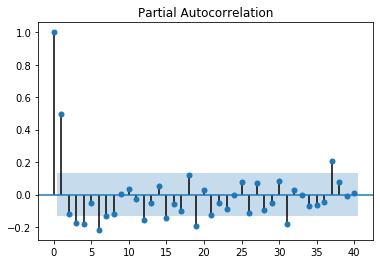

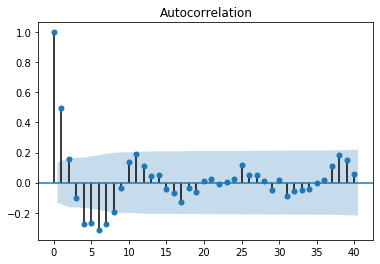

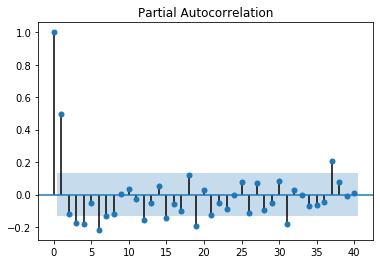

In [9]:
splt.plot_acf(milk_decomp.resid[6:-6], lags = 40)
splt.plot_pacf(milk_decomp.resid[6:-6], lags = 40)

### What can we learn from these ACF and PCF plots
For our PCF we see some non-zero lags that are just barely statisticiallysignificant. With one of the earlier lags far past the confidence intervals. For our ACF we also see lags outside of our confidence interval and possible some evidence of periodicity. Seems as if we've accounted for most of the seasonality and periodicity but we want to keep working on it if we want to make good forecasts.

In [10]:
## Apply ARIMA model
# Create function for ARIMA model
def model_ARIMA(ts, order):
    from statsmodels.tsa.arima_model import ARIMA
    model = ARIMA(ts, order = order)
    model_fit = model.fit(disp=0, method='mle', trend='nc')
    print(model_fit.summary())
    return(model_fit)

arima_milk = model_ARIMA(milk_decomp.resid[6:-6], order = (2,0,1))

                              ARMA Model Results                              
Dep. Variable:                  resid   No. Observations:                  216
Model:                     ARMA(2, 1)   Log Likelihood                 658.121
Method:                           mle   S.D. of innovations              0.011
Date:                Mon, 11 Nov 2019   AIC                          -1308.241
Time:                        07:57:34   BIC                          -1294.740
Sample:                    07-31-1995   HQIC                         -1302.787
                         - 06-30-2013                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.resid     1.4072      0.055     25.587      0.000       1.299       1.515
ar.L2.resid    -0.6030      0.055    -10.956      0.000      -0.711      -0.495
ma.L1.resid    -0.9787      0.014    -67.773    

We have three model coefficience. We see they are all significant and none of the confidence intervals overlap zero. But we don't know if there is a better model as estsablished by Bayesian information criteria. Let's compute the best model for this that we can.

In [11]:
# Create funtions to compute best model by BIC
def model_ARIMA_2(ts, order):
    from statsmodels.tsa.arima_model import ARIMA
    from statsmodels.tsa.arima_model import ARIMAResults    
    model = ARIMA(ts, order = order)
    model_fit = model.fit(disp=0, method='mle', trend='nc')
    BIC = ARIMAResults.bic(model_fit)
    print('Testing model of order: ' + str(order) + ' with BIC = ' + str(BIC))
    return(BIC, order, model_fit)

def step_ARIMA(resid, p_max, d_max, q_max):
    from statsmodels.tsa.arima_model import ARIMAResults    
    from statsmodels.tsa.arima_model import ARIMA
    best_BIC = 9999999999999999.0
    for p in range(p_max + 1):
        for d in range(d_max + 1):
            for q in range(q_max + 1):
                if(p > 0 or q > 0):
                    try:
                        order = (p, d, q)
                        BIC, order, model = model_ARIMA_2(resid, order)
                        if(BIC < best_BIC):
                            best_model = model
                            best_BIC = BIC
                            best_order = order
                    except: 
                        pass        
    return(best_BIC, best_order, best_model) 

BIC, order, model = step_ARIMA(milk_decomp.resid[6:-6], 3, 3, 3)    
print('***************************************')
print('Best model with BIC = ' + str(BIC) + ' and with order '+ str(order))

Testing model of order: (0, 0, 1) with BIC = -1259.2535158002456
Testing model of order: (0, 0, 2) with BIC = -1263.3895258177872
Testing model of order: (0, 0, 3) with BIC = -1261.65898902056
Testing model of order: (0, 1, 1) with BIC = -1208.1215115966227
Testing model of order: (0, 1, 2) with BIC = -1242.5518231300798
Testing model of order: (0, 1, 3) with BIC = -1246.9800717750684
Testing model of order: (0, 2, 1) with BIC = -1188.1204125665993
Testing model of order: (1, 0, 0) with BIC = -1266.337871220621
Testing model of order: (1, 0, 1) with BIC = -1262.7075998773807
Testing model of order: (1, 0, 2) with BIC = -1259.395678185283
Testing model of order: (1, 1, 0) with BIC = -1206.0860866049395
Testing model of order: (1, 2, 0) with BIC = -1085.33203648243
Testing model of order: (2, 0, 0) with BIC = -1263.784872165231
Testing model of order: (2, 0, 1) with BIC = -1294.740052170144
Testing model of order: (2, 0, 2) with BIC = -1291.3156033726598
Testing model of order: (2, 1, 0)

### What can we learn from this 
To find the best BIC we searched a grid of p, d, q values for an optimal ARIMA model based on the Bayseian information criteria. Which , interestingly enough, was the original one we 'guessed' or 'started with' - but don't let that fool you - iterating over the grid will ensure you get the best BIC for your model. Our p, d, and q values are 2, 0, 1, respectively. Now that we've explored the data we can compute and evaluate a forecast model.

Year                   int64
Month                 object
Cotagecheese.Prod    float64
Icecream.Prod        float64
Milk.Prod            float64
N.CA.Fat.Price       float64
Month.Count          float64
monthNumSqred        float64
monthNumCubed          int64
milk_log             float64
dtype: object


/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


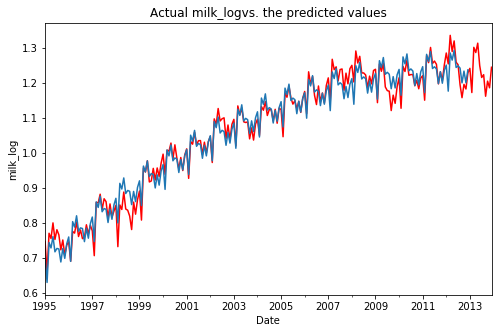

In [12]:
# Create new features
# Count of months from the start of the series and the square of the count months

# Normalize the time features (month data)
from scipy.stats import zscore
CD.loc[:,['Month.Count','monthNumSqred']] = CD.loc[:,['Month.Count','monthNumSqred']].apply(zscore)

# Check data
print(CD.dtypes)
CD.head()

# Create dummy variables for the months
years = int(len(CD.milk_log)/12)
CD.loc[:,'Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] * years
dummies = pd.get_dummies(CD.loc[:,'Month'])
CD[list(dummies.columns)] = dummies

CD.head()
CD.tail()
# Compute linear model for coefficients of the trend and seasonal features
import sklearn.linear_model as lm
features = CD.loc[:'2012-12-31', ['Month.Count', 'monthNumSqred', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
pred = CD.loc[:'2012-12-31', 'milk_log'].as_matrix()
lm_mod = lm.LinearRegression(fit_intercept = False)
mod_fit = lm_mod.fit(features,pred)

# Establish predictions and the residual
CD.loc[:'2012-12-31', 'scores'] = mod_fit.predict(features)
CD.loc[:'2012-12-31', 'resids'] = CD.loc[:'2012-12-31', 'scores'] - CD.loc[:'2012-12-31', 'milk_log']

# Compare predicted trend and seasonal components to actual milk production time series
# Create funtion to plot both together
def plot_mod_fit(df, col):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8, 5)) # set plot area
    ax = fig.gca() # define axis  
    df.loc[:, col].plot(color = 'r', ax = ax)
    df.loc[:, 'scores'].plot(ax = ax) 
    ax.set_title('Actual ' + col + 'vs. the predicted values') # Give the plot a main title
    ax.set_xlabel('Date') # Set text for the x axis
    ax.set_ylabel(col)# Set text for y axis

# Apply to data
plot_mod_fit(CD, 'milk_log')

In [13]:
# Make function to find RMSE
def RMSE(ts, score):
    from math import sqrt
    return sqrt(np.std(ts - score))

# Establish variables
features3 = CD.loc['2012-12-31':, ['Month.Count', 'monthNumSqred', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()

# Apply function
RMSE(CD.loc['2012-12-31':, 'milk_log'].as_matrix(), mod_fit.predict(features3))

/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


0.13750978759549748

### What can we learn from this plot?
Here we can see that the trend and seasonal components fit the actual data very well. So we can compare better for our later models, we computed the root mean square error (RMSE) which was about .14.

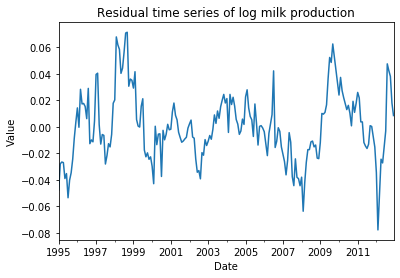

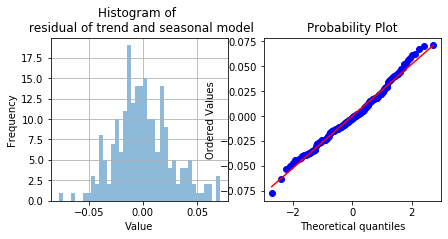

In [14]:
# time series plot and distribution of the residuals

# Create function to plot
def dist_ts(ts, lab = '', bins = 40):
    import scipy.stats as ss
    ## Setup a figure with two subplots side by side
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
    ## Plot the histogram with labels
    ts.hist(ax = ax1, bins = bins, alpha = 0.5)
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram of ' + lab)
    ## Plot the q-q plot on the other axes
    ss.probplot(ts, plot = ax2)

plot_ts(CD.loc[:'2012-12-31', 'resids'], title = 'Residual time series of log milk production')
dist_ts(CD.loc[:'2012-12-31', 'resids'], '\n residual of trend and seasonal model')

In [15]:
DF_Test(CD.loc[:'2012-12-31', 'resids'])

D-F statistic = -4.635022660297532
p-value = 0.00011127276322609451
number of lags used = 0
Critical value at 5% confidence = -2.875078880098608
Critical value at 10% confidence = -2.5739861168199027


### What can we learn from these plots/stats?
The time milk production time series plot of the residuals show some slight periodic behavior. The distribution plot shows an overal normal distribution, and our QQ plot can solidify that hunch - although there are a few data points on the end that skew that just a bit. Now we can ask if the residual series is stationary. We can see that our p-value is significant, so we can reject the null, meaning that is it stationary. Now we can compute the ARIMA model for the residual. We can train a model (without the last year), which we will use to test our trained model.

In [16]:
# Determine the best ARIMA mode order
BIC, order, model_fit = step_ARIMA(CD.loc[:'2012-12-31', 'resids'], 4, 3, 4)
print('Best order = ' + str(order) + ' best BIC = ' + str(BIC))

Testing model of order: (0, 0, 1) with BIC = -1096.1336464782605
Testing model of order: (0, 0, 2) with BIC = -1142.1351120431837
Testing model of order: (0, 0, 3) with BIC = -1173.3440886639617
Testing model of order: (0, 0, 4) with BIC = -1172.9355707894797
Testing model of order: (0, 1, 1) with BIC = -1188.083548138139
Testing model of order: (0, 1, 2) with BIC = -1183.6464828653875
Testing model of order: (0, 1, 3) with BIC = -1179.593148183076
Testing model of order: (0, 1, 4) with BIC = -1177.4371891227809
Testing model of order: (0, 2, 1) with BIC = -1172.6689265399048
Testing model of order: (1, 0, 0) with BIC = -1207.2167701085843
Testing model of order: (1, 0, 1) with BIC = -1202.2009014367902
Testing model of order: (1, 0, 2) with BIC = -1196.9311489658367
Testing model of order: (1, 0, 3) with BIC = -1191.5702864183706
Testing model of order: (1, 0, 4) with BIC = -1187.067451112058
Testing model of order: (1, 1, 0) with BIC = -1187.6811562095365
Testing model of order: (1, 

/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing model of order: (1, 2, 2) with BIC = -1171.572815927896
Testing model of order: (1, 2, 3) with BIC = -1160.9762314227216
Testing model of order: (2, 0, 0) with BIC = -1202.2178462014444
Testing model of order: (2, 0, 1) with BIC = -1196.8763431501905
Testing model of order: (2, 0, 2) with BIC = -1191.557982238319
Testing model of order: (2, 0, 3) with BIC = -1187.2600203407744
Testing model of order: (2, 0, 4) with BIC = -1183.5932387982502
Testing model of order: (2, 1, 0) with BIC = -1182.9453629293462
Testing model of order: (2, 1, 1) with BIC = -1188.5544609498036
Testing model of order: (2, 1, 2) with BIC = -1182.923127043851
Testing model of order: (2, 2, 0) with BIC = -1100.5232125780508
Testing model of order: (2, 2, 1) with BIC = -1165.410434040843
Testing model of order: (2, 2, 2) with BIC = -1160.8453321981372
Testing model of order: (2, 2, 3) with BIC = -1169.0194071905057


/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing model of order: (2, 2, 4) with BIC = -1164.2048940779277
Testing model of order: (3, 0, 0) with BIC = -1196.9162247070935
Testing model of order: (3, 0, 1) with BIC = -1191.5421899610587
Testing model of order: (3, 0, 2) with BIC = -1195.2592456944215
Testing model of order: (3, 0, 3) with BIC = -1183.4085938424128
Testing model of order: (3, 0, 4) with BIC = -1179.119304337733
Testing model of order: (3, 1, 0) with BIC = -1178.4453220375638
Testing model of order: (3, 1, 1) with BIC = -1183.2239947819787
Testing model of order: (3, 1, 2) with BIC = -1178.4607017849276
Testing model of order: (3, 2, 0) with BIC = -1104.481542920792
Testing model of order: (3, 2, 1) with BIC = -1160.8051771633243
Testing model of order: (3, 2, 2) with BIC = -1155.4802203896538


/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing model of order: (3, 2, 3) with BIC = -1152.7962832862872


/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Testing model of order: (3, 2, 4) with BIC = -1148.5901397093842
Testing model of order: (4, 0, 0) with BIC = -1191.550949940035
Testing model of order: (4, 0, 1) with BIC = -1187.756016459352
Testing model of order: (4, 0, 2) with BIC = -1196.665770290936
Testing model of order: (4, 0, 3) with BIC = -1185.873800504576


/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Testing model of order: (4, 0, 4) with BIC = -1177.104226826604
Testing model of order: (4, 1, 0) with BIC = -1177.072114554622
Testing model of order: (4, 1, 1) with BIC = -1173.1218271845182
Testing model of order: (4, 1, 2) with BIC = -1167.8366633936855


/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Testing model of order: (4, 1, 3) with BIC = -1175.5250851991598


/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Testing model of order: (4, 1, 4) with BIC = -1170.9826765119906
Testing model of order: (4, 2, 0) with BIC = -1124.9968882082514
Testing model of order: (4, 2, 1) with BIC = -1159.2129493848606
Testing model of order: (4, 2, 2) with BIC = -1155.3407913469227
Testing model of order: (4, 2, 3) with BIC = -1150.0866248719356
Testing model of order: (4, 2, 4) with BIC = -1148.6587813954936
Best order = (1, 0, 0) best BIC = -1207.2167701085843


/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


### What did we learn from this BIC iterative process?
Our best model order is (1, 0, 0) and now we can compute an ARIMA model. This model can be used to make predictions about the last year of the milk production time series.

In [17]:
start_index = len(CD.loc[:'2012-12-31', 'resids'])
end_index = start_index + 12
model_prediction = model_fit.predict(start = start_index, end = end_index)
model_prediction

2013-01-31    0.007042
2013-02-28    0.005873
2013-03-31    0.004897
2013-04-30    0.004084
2013-05-31    0.003405
2013-06-30    0.002840
2013-07-31    0.002368
2013-08-31    0.001975
2013-09-30    0.001647
2013-10-31    0.001373
2013-11-30    0.001145
2013-12-31    0.000955
2014-01-31    0.000796
Freq: M, dtype: float64

### What do these values tell us?
Now that we have these values, we can compute the prediction for the last 12 months of dairy production time series.

/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


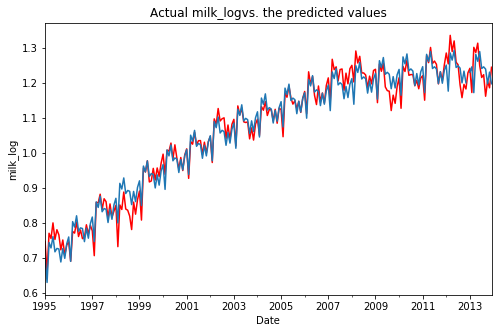

In [18]:
# Make forecast for last 12 months
features2 = CD.loc['2012-12-31':, ['Month.Count', 'monthNumSqred', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()

# Establish predictions for the forecast
CD.loc['2012-12-31':, 'scores'] = mod_fit.predict(features2) - model_prediction

# Plot actual time series (blue) with our prediction (red)
plot_mod_fit(CD, 'milk_log')

### What can we learn from this plot?
Our forecast looks appropriate. Our prediction for the last twelve months (all the way to the right of the plot) match up *very* closely with the actual data. Now let's find the RMSE and compare these results to the model with out trend and seasonal component.

In [19]:
# RMSE
RMSE(CD.loc['2012-12-31':, 'milk_log'].as_matrix(), CD.loc['2012-12-31':, 'scores'])

/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


0.2371186924777437

### What does this RMSE tell us?
Because we calculated the RMSE before the ARIMA component, we can now compare how the ARIMA component has changed the predictive power of the model. The RMSE has gone from from 0.14 to 0.24. Adding the ARIMA component to the model has not improved our prediction.

## Summary

We were able to successfully predict the forecasted 12 months of dairy production, this is further demonstrated in the above plot, where the red (actual) and blue (our predicted) line up reasonably well.